# (Gaussian) Naive Bayes Classifier

In [163]:
# Structure of Notebook
# 1. Import libraries and data
# 2. ETL (Extract, Transform, Load)
# 3. EDA (Exploratory Data Analysis)
# 4. Based on data and target, choose model
# 5. Choose basic model
# 6. Fit model on training data
# 7. Predict model on test data
# 8. Determine benchmark for metric
# 9. Optimize model or choose different model
# 10. Evaluate metrics
# 11. Save model parameters OR go back to (2)

In [164]:
# Import libraries and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris_np = load_iris(as_frame=True)

In [165]:
# Extract training and test data
X_train, X_test, Y_train, Y_test = train_test_split(iris_np.data, iris_np.target, test_size=0.4, random_state=444)

In [166]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

X_train = X_train[:, 0:2]
X_test = X_test[:, 0:2]

In [167]:
# Instantiate the model
model = GaussianNB()

In [168]:
# Fit model on training data
model.fit(X_train, Y_train)

GaussianNB()

In [169]:
# Predict on the test data
Y_hat = model.predict(X_test)

In [170]:
# Metrics for the model
print('accuracy', accuracy_score(Y_hat, Y_test))

accuracy 0.7833333333333333


In [171]:
print('classification report')
print(classification_report(Y_test, Y_hat))

classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.76      0.67      0.71        24
           2       0.58      0.73      0.65        15

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.80      0.78      0.79        60



In [172]:
print('confusion matrix')
print(confusion_matrix(Y_test, Y_hat))

confusion matrix
[[20  1  0]
 [ 0 16  8]
 [ 0  4 11]]


### Train Data Decision Boundaries

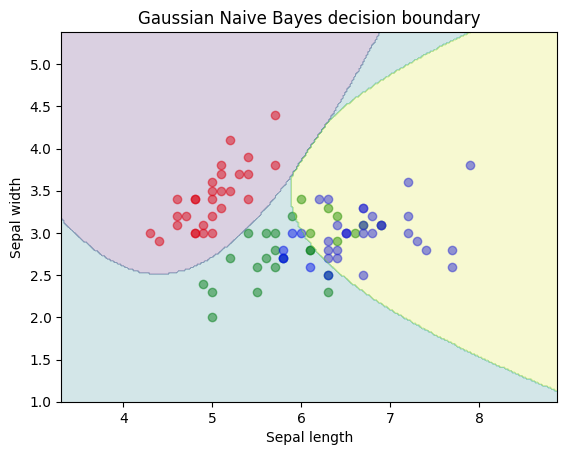

In [173]:


# Plot the data
plt.figure()
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_train[Y_train == i, 0], X_train[Y_train == i, 1], color=colors[i], alpha=0.5)

# Plot the decision boundary

h = 0.02 # This controls the smoothness of the boundaries (change it if you want to see)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

# Add labels and show the plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Naive Bayes decision boundary')
plt.show()

### Test Data Decision Boundaries

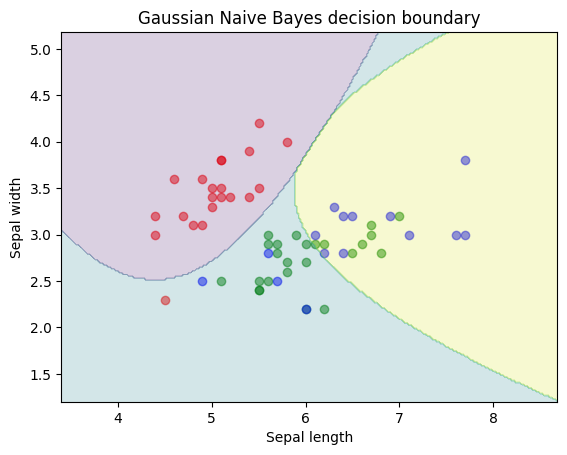

In [174]:
# Plot the data
plt.figure()
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_test[Y_test == i, 0], X_test[Y_test == i, 1], color=colors[i], alpha=0.5)

# Plot the decision boundary
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

# Add labels and show the plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian Naive Bayes decision boundary')
plt.show()